# Algorithms

---

# Classification

---

### Naive Bayes

---

In [1]:
# import libraries

import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import cm
import matplotlib.pyplot as plt
from pandas.tools.plotting import scatter_matrix

%matplotlib inline

from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split, KFold, StratifiedKFold


In [2]:
# alternate numbers belongs to different classification

features = np.array([ 200,  1,  202,  3,  204,  5,  206,  7,  208,  9, 210, 11, 212, 13, 214, 15, 216,
       17, 218, 19, 220, 21, 222, 23, 224, 25, 226, 27, 228, 29, 230, 31, 232, 33,
       234, 35, 236, 37, 238, 39, 240, 41, 242, 43, 244, 45, 246, 47, 248, 49, 250,
       51, 252, 53, 254, 55, 256, 57, 258, 59, 260, 61, 262, 63, 264, 65, 266, 67,
       268, 69, 270, 71, 272, 73, 274, 75, 276, 77, 278, 79, 280, 81, 282, 83, 284,
       85, 286, 87, 288, 89, 290, 91, 292, 93, 294, 95, 296, 97, 298, 99])
features

array([200,   1, 202,   3, 204,   5, 206,   7, 208,   9, 210,  11, 212,
        13, 214,  15, 216,  17, 218,  19, 220,  21, 222,  23, 224,  25,
       226,  27, 228,  29, 230,  31, 232,  33, 234,  35, 236,  37, 238,
        39, 240,  41, 242,  43, 244,  45, 246,  47, 248,  49, 250,  51,
       252,  53, 254,  55, 256,  57, 258,  59, 260,  61, 262,  63, 264,
        65, 266,  67, 268,  69, 270,  71, 272,  73, 274,  75, 276,  77,
       278,  79, 280,  81, 282,  83, 284,  85, 286,  87, 288,  89, 290,
        91, 292,  93, 294,  95, 296,  97, 298,  99])

In [3]:
target = np.tile([0,1],50)
target

array([0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1])

In [4]:
df = pd.DataFrame([features,target])
df = df.T

df.columns = ['num','class']
df.head()

,num,class
0,200,0
1,1,1
2,202,0
3,3,1
4,204,0


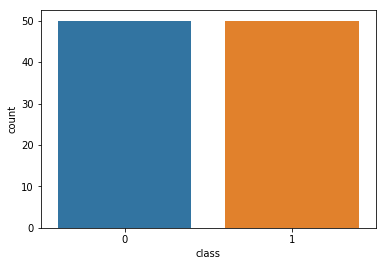

In [5]:
sns.countplot(df['class'],label="Count")

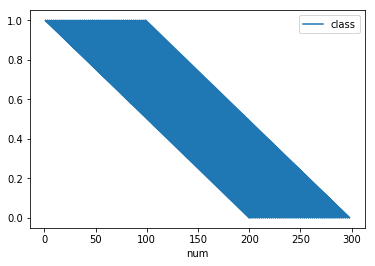

In [6]:
df.plot('num','class')

In [7]:
X_train, X_test, y_train, y_test = train_test_split(features, target,
                                                    test_size=0.23, random_state=68)

In [8]:
X_train = X_train.reshape(-1,1)
#y_train = y_train.reshape(-1,1)
X_test = X_test.reshape(-1,1)

In [9]:
gnb = GaussianNB()
gnb

GaussianNB(priors=None)

In [10]:
gnb.fit(X_train, y_train)

GaussianNB(priors=None)

In [11]:
y_pred = gnb.predict(X_test)
y_pred

array([1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0,
       0])

In [12]:
print("Number of mislabeled points out of a total %d points : %d"
...       % (len(features),(y_test != y_pred).sum()))

Number of mislabeled points out of a total 100 points : 0


In [13]:
from sklearn.metrics import classification_report

In [14]:
classificationReport = classification_report(y_test, y_pred)
classificationReport

'             precision    recall  f1-score   support\n\n          0       1.00      1.00      1.00        14\n          1       1.00      1.00      1.00         9\n\navg / total       1.00      1.00      1.00        23\n'

In [15]:
def plot_classification_report(cr, title='Classification report ', with_avg_total=False, cmap=plt.cm.Blues):

    lines = cr.split('\n')

    classes = []
    plotMat = []
    for line in lines[2 : (len(lines) - 3)]:
        #print(line)
        t = line.split()
        # print(t)
        classes.append(t[0])
        v = [float(x) for x in t[1: len(t) - 1]]
        print(v)
        plotMat.append(v)

    if with_avg_total:
        aveTotal = lines[len(lines) - 1].split()
        classes.append('avg/total')
        vAveTotal = [float(x) for x in t[1:len(aveTotal) - 1]]
        plotMat.append(vAveTotal)

    plt.imshow(plotMat, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    x_tick_marks = np.arange(3)
    y_tick_marks = np.arange(len(classes))
    plt.xticks(x_tick_marks, ['precision', 'recall', 'f1-score'], rotation=45)
    plt.yticks(y_tick_marks, classes)
    plt.tight_layout()
    plt.ylabel('Classes')
    plt.xlabel('Measures')

[1.0, 1.0, 1.0]
[1.0, 1.0, 1.0]


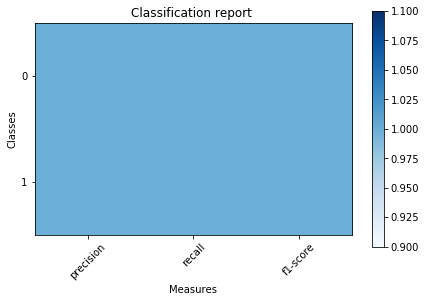

In [16]:
plot_classification_report(classificationReport)

### GridSearchCV

In [17]:
features.shape, target.shape

((100,), (100,))

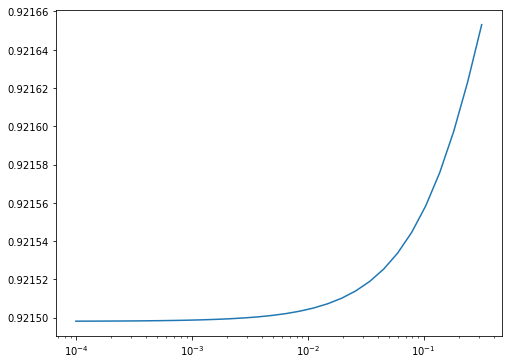

In [18]:
lasso = Lasso(random_state=0)
alphas = np.logspace(-4, -0.5, 30)

tuned_parameters = [{'alpha': alphas}]
n_folds = 3

clf = GridSearchCV(lasso, tuned_parameters, cv=n_folds, refit=False)
clf.fit(X_train.reshape(-1,1), y_train)
scores = clf.cv_results_['mean_test_score']
scores_std = clf.cv_results_['std_test_score']
plt.figure().set_size_inches(8, 6)
plt.semilogx(alphas, scores)


(0.0001, 0.31622776601683794)

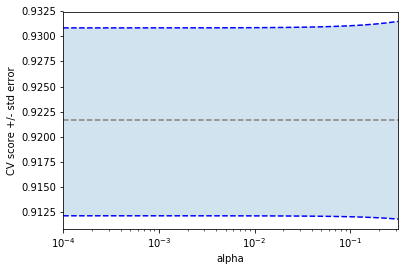

In [19]:
# plot error lines showing +/- std. errors of the scores
std_error = scores_std / np.sqrt(n_folds)

plt.semilogx(alphas, scores + std_error, 'b--')
plt.semilogx(alphas, scores - std_error, 'b--')

# alpha=0.2 controls the translucency of the fill color
plt.fill_between(alphas, scores + std_error, scores - std_error, alpha=0.2)

plt.ylabel('CV score +/- std error')
plt.xlabel('alpha')
plt.axhline(np.max(scores), linestyle='--', color='.5')
plt.xlim([alphas[0], alphas[-1]])

### Logistic Regression

In [20]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix

In [21]:
features.shape, target.shape

((100,), (100,))

In [22]:
model = LogisticRegression()
model

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [23]:
model.fit(X_train.reshape(-1,1), y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [24]:
y_pred = model.predict(X_test.reshape(-1,1))
y_pred

array([1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0,
       0])

In [25]:
confusion_matrix(y_test, y_pred)

array([[14,  0],
       [ 0,  9]], dtype=int64)

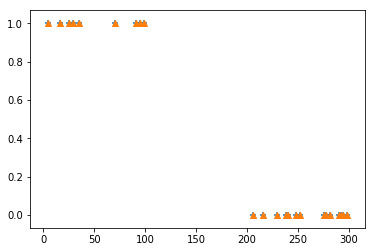

In [26]:
plt.scatter(X_test.reshape(-1,1), y_test, marker='+', cmap='autumn')
plt.scatter(X_test.reshape(-1,1), y_pred, marker='^')


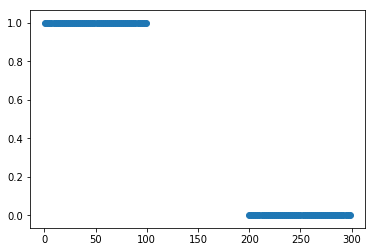

In [27]:
plt.scatter(features, target)

### Linear SVC

In [28]:
from sklearn.svm import LinearSVC, SVC

In [29]:
model = LinearSVC()
model

LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0)

In [30]:
%time model.fit(X_train.reshape(-1,1), y_train)

Wall time: 15.5 ms


LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0)

In [31]:
y_pred = model.predict(X_test.reshape(-1,1))
y_pred

array([1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0,
       0])

In [32]:
confusion_matrix(y_test, y_pred)

array([[14,  0],
       [ 0,  9]], dtype=int64)

In [33]:
print(model.coef_)

[[-0.00929626]]


In [34]:
print(model.intercept_)

[1.29241822]


In [35]:
x0 = df.loc[df['class'] == 0]
x1 = df.loc[df['class'] == 1]

x0.head()

,num,class
0,200,0
2,202,0
4,204,0
6,206,0
8,208,0


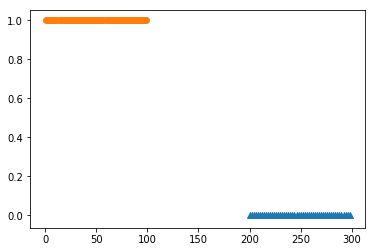

In [36]:
plt.scatter(x0['num'], x0['class'], marker='^')
plt.scatter(x1['num'], x1['class'], marker='o')
